In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests

from env import github_token, github_username

import acquire_zach as az
import wrangle as w

import numpy as np
import pandas as pd

# acquire
from requests import get
from bs4 import BeautifulSoup
from time import sleep
import os

# prepare
import unicodedata
import re
import json
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

# explore
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# model
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Acquire

In [2]:
df = pd.read_csv('google_readmes1020.csv').drop(columns="Unnamed: 0")

In [3]:
df.head(2)

,repo,language,readme_contents
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...


# Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             1020 non-null   object
 1   language         983 non-null    object
 2   readme_contents  1005 non-null   object
dtypes: object(3)
memory usage: 24.0+ KB


In [5]:
df.isnull().sum()

repo                0
language           37
readme_contents    15
dtype: int64

In [6]:
df[df.language.isnull()]

,repo,language,readme_contents
15,google/transit,NaN,The repository contains specification to manip...
22,google/overcoming-conflicting-data,NaN,# Conflicting Data for Model Updates\n\nThis r...
46,google/deepdream,NaN,# deepdream\n\nThis repository contains IPytho...
56,google/skywater-pdk-libs-sky130_fd_pr,NaN,:lib:`sky130_fd_pr` - SKY130 Primitive Models ...
67,google/proto-quic,NaN,proto-quic is deprecated\n====================...
72,google/CTAP2-test-tool-corpus,NaN,"# <img alt=""Test Tool logo"" src=""docs/img/logo..."
101,google/healthcare-text-annotation,NaN,# Healthcare Text Annotation Guidelines\n\nMed...
153,google/or-models,NaN,# OR-Models\n\nThis repository contains a mode...
191,google/mlir-npcomp,NaN,# mlir-npcomp\n\nThis project has moved to the...
222,google/oss-vulnerability-guide,NaN,# Guide to coordinated vulnerability disclosur...


In [7]:
df[df.readme_contents.isnull()]

,repo,language,readme_contents
32,google/aistplusplus_dataset,JavaScript,NaN
138,google/google.github.io,HTML,NaN
154,google/file.dart,Dart,NaN
277,google/.github,NaN,NaN
378,google/certificate-transparency-rfcs,Python,NaN
413,google/aichoreographer,HTML,NaN
425,google/look-before-you-speak,HTML,NaN
470,google/jsontoken,Java,NaN
587,google/coursebuilder-core,Python,NaN
591,google/prochlo,C++,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             969 non-null    object
 1   language         969 non-null    object
 2   readme_contents  969 non-null    object
dtypes: object(3)
memory usage: 30.3+ KB


In [10]:
df.isnull().sum()

repo               0
language           0
readme_contents    0
dtype: int64

In [11]:
df.language.value_counts()

Python              195
C++                 152
Go                  121
Java                 92
JavaScript           86
TypeScript           51
Dart                 39
C                    36
Jupyter Notebook     29
HTML                 26
Rust                 21
Shell                21
Kotlin               15
Objective-C          11
Haskell               7
Vim script            7
Verilog               7
Ruby                  6
Swift                 5
Starlark              4
Vue                   4
C#                    4
CSS                   4
MATLAB                4
PHP                   3
R                     3
Lean                  2
CMake                 2
Jsonnet               1
TeX                   1
PureBasic             1
PowerShell            1
Makefile              1
Emacs Lisp            1
Assembly              1
Roff                  1
HCL                   1
Groovy                1
Crystal               1
Common Lisp           1
Name: language, dtype: int64

<AxesSubplot:>

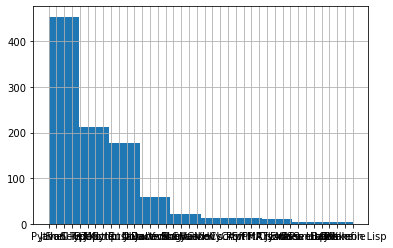

In [12]:
df.language.hist()

[Text(0.5, 1.0, 'Distribution of Google Coding Languages in Github Repos'),
 Text(0.5, 0, 'Number of Repos')]

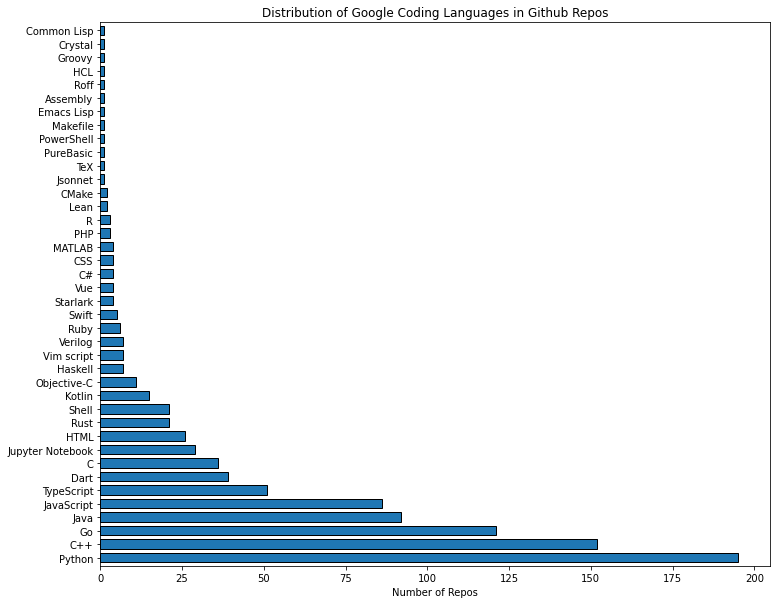

In [13]:
fig = plt.figure(figsize=(12, 10))

ax = df.language.value_counts().plot.barh(width=.7, ec='black')
plt.xticks(rotation=0)
ax.set(title='Distribution of Google Coding Languages in Github Repos', xlabel='Number of Repos')

In [14]:
len(df.readme_contents[0])

8384

In [15]:
length = []
for c in df.readme_contents:
    text_len = len(c)
    length.append(text_len)

length

[8384,
 2872,
 2198,
 4730,
 1869,
 3206,
 5079,
 218,
 2898,
 13752,
 998,
 3997,
 675,
 907,
 727,
 3189,
 4730,
 397,
 926,
 927,
 5090,
 9938,
 1958,
 703,
 2318,
 2933,
 7279,
 18254,
 1704,
 17228,
 2291,
 1949,
 11376,
 3147,
 1257,
 2254,
 2270,
 31458,
 292,
 5263,
 4914,
 4283,
 1513,
 2597,
 1957,
 216,
 16225,
 1421,
 4600,
 22596,
 1765,
 11797,
 12227,
 210,
 19,
 1499,
 9671,
 4078,
 4500,
 1339,
 2736,
 3910,
 6440,
 9670,
 1063,
 1843,
 856,
 4712,
 936,
 1167,
 275,
 8047,
 203,
 4345,
 651,
 2604,
 2180,
 981,
 1760,
 6290,
 2946,
 1963,
 5366,
 2131,
 983,
 4285,
 1031,
 4664,
 2598,
 2381,
 1204,
 43298,
 803,
 5784,
 287,
 5276,
 1173,
 727,
 1443,
 2668,
 16677,
 6431,
 2177,
 5071,
 2611,
 10275,
 2570,
 5839,
 24805,
 1258,
 538,
 932,
 299,
 3012,
 3067,
 2630,
 1953,
 15940,
 1675,
 4969,
 652,
 1853,
 2153,
 1885,
 474,
 2898,
 25076,
 2663,
 7635,
 2594,
 5712,
 24,
 4375,
 502,
 112,
 541,
 5862,
 2540,
 2322,
 497,
 4577,
 1435,
 10591,
 2560,
 1464,
 224

In [16]:
#def get_readme_length():
#    """
#    This function reads the length of each readme and
#    appends it to a list.
#    """
#    
#    length = []
#    for c in df.readme_contents:
#        text_len = len(c)
#        length.append(text_len)
#    
#    return length

In [17]:
def get_length(column):
    """
    This function reads the length of each readme and
    appends it to a list.
    """
    
    length = []
    for c in df[column]:
        text_len = len(c)
        length.append(text_len)
    
    return length

In [18]:
df['readme_length'] = get_length("readme_contents")

In [19]:
df.head(2)

,repo,language,readme_contents,readme_length
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....,8384
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...,2872


<AxesSubplot:>

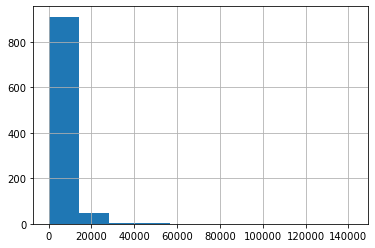

In [20]:
df.readme_length.hist()

In [21]:
df.readme_length.describe()

count       969.000000
mean       4919.704850
std        7116.134426
min          10.000000
25%        1363.000000
50%        2955.000000
75%        5946.000000
max      142109.000000
Name: readme_length, dtype: float64

<AxesSubplot:xlabel='readme_length'>

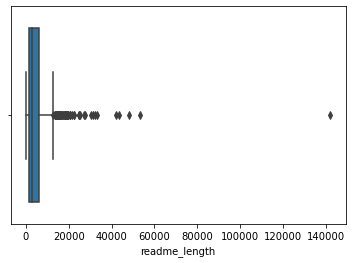

In [22]:
sns.boxplot(data=df, x='readme_length')

In [23]:
(df.readme_length > 120_000).sum()

1

In [24]:
df[df.readme_length > 120_000]

,repo,language,readme_contents,readme_length
650,google/corpuscrawler,Python,# Corpus Crawler\n\n_Corpus Crawler_ is a tool...,142109


In [25]:
df[df.readme_length > 20_000]

,repo,language,readme_contents,readme_length
40,google/glog,C++,Google Logging Library\n======================...,31458
53,google/AFL,C,# american fuzzy lop\n\n[![Build Status](https...,22596
98,google/seqio,Python,"# SeqIO: Task-based datasets, preprocessing, a...",43298
116,google/closure-stylesheets,Java,# Closure Stylesheets\n\nClosure Stylesheets i...,24805
134,google/data-layer-helper,JavaScript,# Data Layer Helper Library\nThis library prov...,25076
156,google/anthos-microk8s,HCL,![Anthos Config Management + Cloud Source Repo...,22477
181,google/stm32_bare_lib,C,# STM32 Bare Library\n\nSystem functions and e...,20784
204,google/basis_universal,C++,# Repository note\n\nThis repository is design...,24865
264,google/jax,Python,"<div align=""center"">\n<img src=""https://raw.gi...",21486
333,google/fscrypt,Go,# fscrypt [![GitHub version](https://badge.fur...,42259


In [26]:
df.repo.duplicated().value_counts()

False    969
Name: repo, dtype: int64

In [27]:
# transform into a series

string = " ".join(df.readme_contents)

string = " ".join(w.clean(string))

In [28]:
words = pd.Series(string.split())

# From the Series we can extract the value_counts, which is our raw count
# for term frequency. Once we have the raw counts, we can calculate the
# other measures.
(pd.DataFrame({'raw_count': words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

,raw_count,frequency,augmented_frequency
e,327020,0.111964,1.000000
t,236860,0.081095,0.724298
o,205583,0.070387,0.628656
i,204572,0.070041,0.625564
a,199362,0.068257,0.609632
r,187814,0.064303,0.574320
n,177020,0.060607,0.541312
s,174124,0.059616,0.532457
l,148936,0.050992,0.455434
c,138062,0.047269,0.422182


In [29]:
df['clean_content'] = df.readme_contents.apply(w.clean)

In [30]:
df.head(2)

,repo,language,readme_contents,readme_length,clean_content
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....,8384,ci_edit ci_edit text editor help view edit tex...
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...,2872,bmstoolkit toolkit installing creating initial...


In [31]:
df['cleaned_length'] = get_length("clean_content")

In [32]:
df.head(2)

,repo,language,readme_contents,readme_length,clean_content,cleaned_length
0,google/ci_edit,Python,# What is ci_edit\n\nci_edit is a text editor....,8384,ci_edit ci_edit text editor help view edit tex...,5408
1,google/bms-toolkit,Shell,# bms-toolkit\n\nToolkit for installing and cr...,2872,bmstoolkit toolkit installing creating initial...,1918


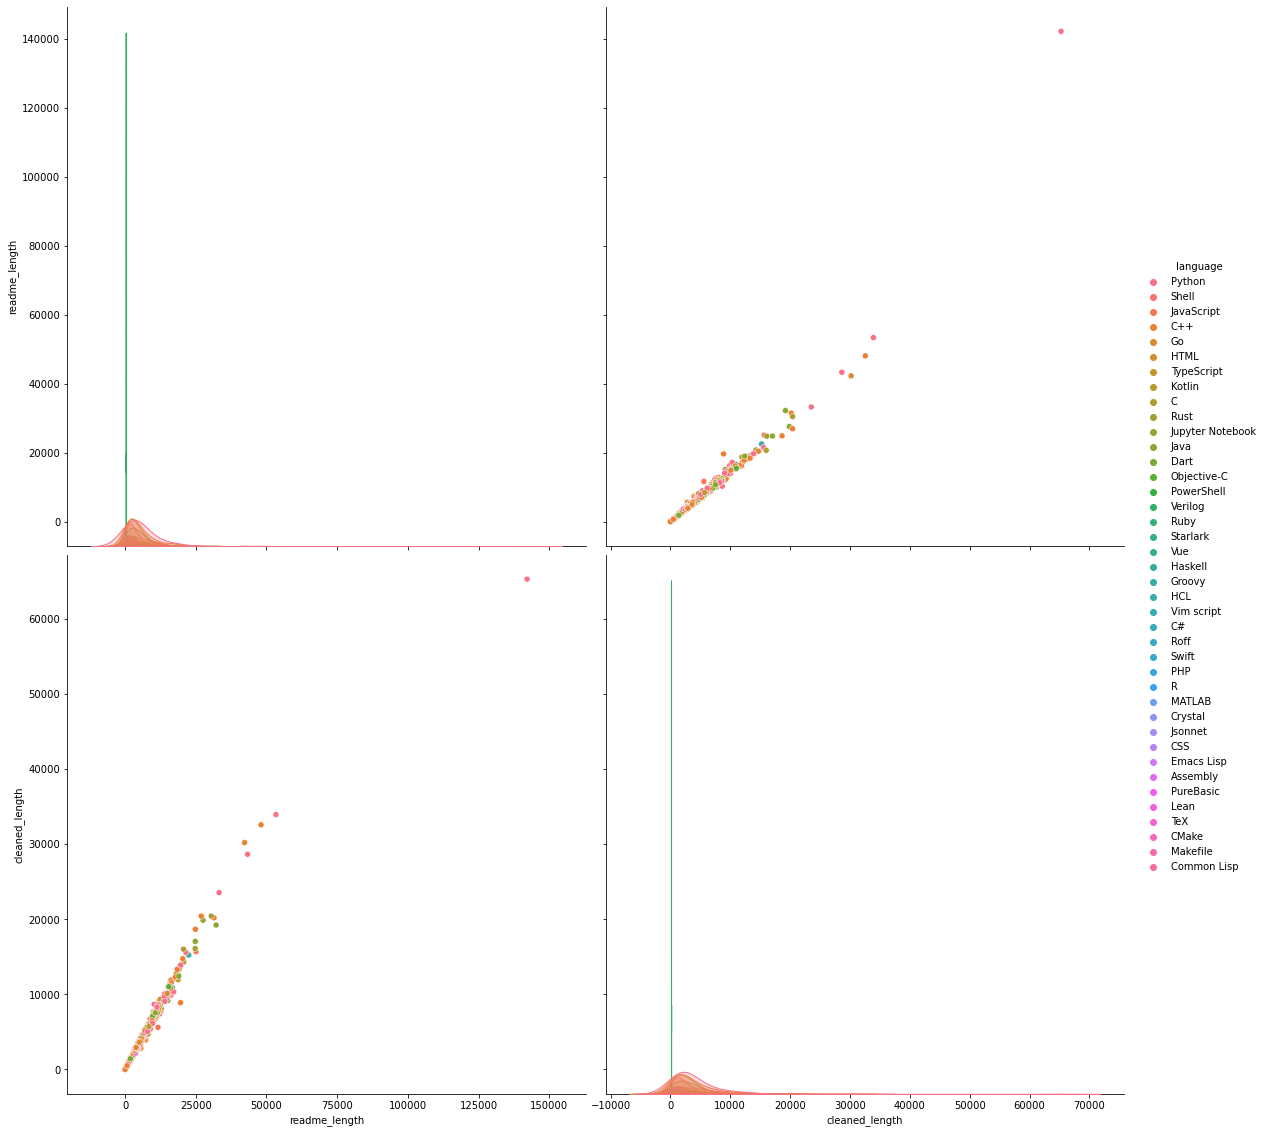

In [33]:
#fig, ax = plt.subplots(figsize=(20,20))
sns.pairplot(df, hue='language', height=8, aspect=1)

In [34]:
languages = (df.language.value_counts()).index.to_list()

In [35]:
re.sub(r'\s', '', languages[8].lower())

'jupyternotebook'

In [35]:
for language in languages:
    lang = re.sub(r'\s', '', language.lower())
    print(f'{lang}_words')
    

python_words
c++_words
go_words
java_words
javascript_words
typescript_words
dart_words
c_words
jupyternotebook_words
html_words
rust_words
shell_words
kotlin_words
objective-c_words
verilog_words
haskell_words
vimscript_words
ruby_words
swift_words
matlab_words
c#_words
vue_words
css_words
starlark_words
r_words
php_words
lean_words
cmake_words
jsonnet_words
roff_words
commonlisp_words
purebasic_words
tex_words
emacslisp_words
powershell_words
hcl_words
assembly_words
crystal_words
makefile_words
groovy_words


In [80]:
df.clean_content[0].split()

['ci_edit',
 'ci_edit',
 'text',
 'editor',
 'help',
 'view',
 'edit',
 'text',
 'file',
 'ci_edit',
 'run',
 'command',
 'line',
 'also',
 'called',
 'terminal',
 'start',
 'using',
 'ci_edit',
 'download',
 'ci_edit',
 'open',
 'execute',
 'cipy',
 'ci_edit',
 'many',
 'command',
 'line',
 'text',
 'editor',
 'require',
 'learning',
 'different',
 'set',
 'mouse',
 'keyboard',
 'command',
 'many',
 'u',
 'use',
 'graphical',
 'editor',
 'gui',
 'support',
 'common',
 'set',
 'command',
 'like',
 'ctrlq',
 'quit',
 'hold',
 'control',
 'key',
 'press',
 'q',
 'common',
 'command',
 'ctrlq',
 'quit',
 'program',
 'ctrls',
 'save',
 'file',
 'ctrlz',
 'undo',
 'ctrlx',
 'cut',
 'ctrlc',
 'copy',
 'ctrlv',
 'paste',
 'probably',
 'get',
 'idea',
 'common',
 'control',
 'common',
 'command',
 'line',
 'editor',
 'youd',
 'like',
 'edit',
 'file',
 'terminal',
 'window',
 'dont',
 'want',
 'recall',
 'save',
 'quit',
 'unfamiliar',
 'editor',
 'ci_edit',
 'shine',
 'ci_edit',
 'support',
 

In [36]:
df[df.language == 'Python'].clean_content

0       [ci_edit, ci_edit, text, editor, help, view, e...
4       [sa360, bigquery, bootstrapper, provides, supp...
30      [brain, tokyo, workshop, repo, contains, resea...
36      [fedjax, federated, learning, simulation, jax,...
42      [trimmed, match, robust, statistical, techniqu...
                              ...                        
1005    [aist, api, repo, contains, starter, code, usi...
1008    [next, repository, contains, code, model, foll...
1014    [vimdoc, helpfile, generation, vim, plugins, v...
1015    [shoptimizer, _copyright, 2019, google, llc, s...
1016    [vroom, launch, vim, test, vroomimagesvroom_lo...
Name: clean_content, Length: 195, dtype: object

In [36]:
def clean(text, extra_words = ['r', 'u', '2', 'ltgt', "'"]):
    """
    A simple function to cleanup text data:
    takes in a string of text,
    pulls in `nltk`s stopwords and appends any additional `extra_words`
    returns a string filtered for stopwords & lemmatized    
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + extra_words
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [37]:
# create lists of labeled words

python_words = clean(' '.join(df[df.language == 'Python'].readme_contents))
cplusplus_words = clean(' '.join(df[df.language == 'C++'].readme_contents))
go_words = clean(' '.join(df[df.language == 'Go'].readme_contents))
java_words = clean(' '.join(df[df.language == 'Java'].readme_contents))
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
typescript_words = clean(' '.join(df[df.language == 'TypeScript'].readme_contents))
dart_words = clean(' '.join(df[df.language == 'Dart'].readme_contents))
c_words = clean(' '.join(df[df.language == 'C'].readme_contents))
jupyternotebook_words = clean(' '.join(df[df.language == 'Jupyter Notebook'].readme_contents))
html_words = clean(' '.join(df[df.language == 'HTML'].readme_contents))
shell_words = clean(' '.join(df[df.language == 'Shell'].readme_contents))
rust_words = clean(' '.join(df[df.language == 'Rust'].readme_contents))
kotlin_words = clean(' '.join(df[df.language == 'Kotlin'].readme_contents))
objective_c_words = clean(' '.join(df[df.language == 'Objective-C'].readme_contents))
verilog_words = clean(' '.join(df[df.language == 'Verilog'].readme_contents))
vimscript_words = clean(' '.join(df[df.language == 'Vim script'].readme_contents))
haskell_words = clean(' '.join(df[df.language == 'Haskell'].readme_contents))
ruby_words = clean(' '.join(df[df.language == 'Ruby'].readme_contents))
swift_words = clean(' '.join(df[df.language == 'Swift'].readme_contents))
vue_words = clean(' '.join(df[df.language == 'Vue'].readme_contents))
matlab_words = clean(' '.join(df[df.language == 'MATLAB'].readme_contents))
c_sharp_words = clean(' '.join(df[df.language == 'C#'].readme_contents))
starlark_words = clean(' '.join(df[df.language == 'Starlark'].readme_contents))
css_words = clean(' '.join(df[df.language == 'CSS'].readme_contents))
r_words = clean(' '.join(df[df.language == 'R'].readme_contents))
php_words = clean(' '.join(df[df.language == 'PHP'].readme_contents))
cmake_words = clean(' '.join(df[df.language == 'CMake'].readme_contents))
lean_words = clean(' '.join(df[df.language == 'Lean'].readme_contents))
jsonnet_words = clean(' '.join(df[df.language == 'Jsonnet'].readme_contents))
groovy_words = clean(' '.join(df[df.language == 'Groovy'].readme_contents))
assembly_words = clean(' '.join(df[df.language == 'Assembly'].readme_contents))
makefile_words = clean(' '.join(df[df.language == 'Makefile'].readme_contents))
crystal_words = clean(' '.join(df[df.language == 'Crystal'].readme_contents))
emacslisp_words = clean(' '.join(df[df.language == 'Emacs Lisp'].readme_contents))
commonlisp_words = clean(' '.join(df[df.language == 'Common Lisp'].readme_contents))
powershell_words = clean(' '.join(df[df.language == 'PowerShell'].readme_contents))
tex_words = clean(' '.join(df[df.language == 'TeX'].readme_contents))
roff_words = clean(' '.join(df[df.language == 'Roff'].readme_contents))
purebasic_words = clean(' '.join(df[df.language == 'PureBasic'].readme_contents))
hcl_words = clean(' '.join(df[df.language == 'HCL'].readme_contents))

In [38]:
python_words

['ci_edit',
 'ci_edit',
 'text',
 'editor',
 'help',
 'view',
 'edit',
 'text',
 'file',
 'ci_edit',
 'run',
 'command',
 'line',
 'also',
 'called',
 'terminal',
 'start',
 'using',
 'ci_edit',
 'download',
 'ci_edit',
 'open',
 'execute',
 'cipy',
 'ci_edit',
 'many',
 'command',
 'line',
 'text',
 'editor',
 'require',
 'learning',
 'different',
 'set',
 'mouse',
 'keyboard',
 'command',
 'many',
 'u',
 'use',
 'graphical',
 'editor',
 'gui',
 'support',
 'common',
 'set',
 'command',
 'like',
 'ctrlq',
 'quit',
 'hold',
 'control',
 'key',
 'press',
 'q',
 'common',
 'command',
 'ctrlq',
 'quit',
 'program',
 'ctrls',
 'save',
 'file',
 'ctrlz',
 'undo',
 'ctrlx',
 'cut',
 'ctrlc',
 'copy',
 'ctrlv',
 'paste',
 'probably',
 'get',
 'idea',
 'common',
 'control',
 'common',
 'command',
 'line',
 'editor',
 'youd',
 'like',
 'edit',
 'file',
 'terminal',
 'window',
 'dont',
 'want',
 'recall',
 'save',
 'quit',
 'unfamiliar',
 'editor',
 'ci_edit',
 'shine',
 'ci_edit',
 'support',
 

In [39]:
# create a pd.Series of the value_counts of the list

python_freq = pd.Series(python_words).value_counts()
cplusplus_freq = pd.Series(cplusplus_words).value_counts()
go_freq = pd.Series(go_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
typescript_freq = pd.Series(typescript_words).value_counts()
dart_freq = pd.Series(dart_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
jupyternotebook_freq = pd.Series(jupyternotebook_words).value_counts()
html_freq = pd.Series(html_words).value_counts()
shell_freq = pd.Series(shell_words).value_counts()
rust_freq = pd.Series(rust_words).value_counts()
kotlin_freq = pd.Series(kotlin_words).value_counts()
objective_c_freq = pd.Series(objective_c_words).value_counts()
verilog_freq = pd.Series(verilog_words).value_counts()
vimscript_freq = pd.Series(vimscript_words).value_counts()
haskell_freq = pd.Series(haskell_words).value_counts()
ruby_freq = pd.Series(ruby_words).value_counts()
swift_freq = pd.Series(swift_words).value_counts()
vue_freq = pd.Series(vue_words).value_counts()
matlab_freq = pd.Series(matlab_words).value_counts()
c_sharp_freq = pd.Series(c_sharp_words).value_counts()
starlark_freq = pd.Series(starlark_words).value_counts()
css_freq = pd.Series(css_words).value_counts()
r_freq = pd.Series(r_words).value_counts()
php_freq = pd.Series(php_words).value_counts()
cmake_freq = pd.Series(cmake_words).value_counts()
lean_freq = pd.Series(lean_words).value_counts()
jsonnet_freq = pd.Series(jsonnet_words).value_counts()
groovy_freq = pd.Series(groovy_words).value_counts()
assembly_freq = pd.Series(assembly_words).value_counts()
makefile_freq = pd.Series(makefile_words).value_counts()
crystal_freq = pd.Series(crystal_words).value_counts()
emacslisp_freq = pd.Series(emacslisp_words).value_counts()
commonlisp_freq = pd.Series(commonlisp_words).value_counts()
powershell_freq = pd.Series(powershell_words).value_counts()
tex_freq = pd.Series(tex_words).value_counts()
roff_freq = pd.Series(roff_words).value_counts()
purebasic_freq = pd.Series(purebasic_words).value_counts()
hcl_freq = pd.Series(hcl_words).value_counts()

In [40]:
freq_list = [
    python_freq, 
    cplusplus_freq, 
    go_freq, 
    java_freq, 
    javascript_freq, 
    typescript_freq, 
    dart_freq, 
    c_freq, 
    jupyternotebook_freq, 
    html_freq, 
    shell_freq, 
    rust_freq, 
    kotlin_freq, 
    objective_c_freq, 
    verilog_freq, 
    vimscript_freq, 
    haskell_freq, 
    ruby_freq, 
    swift_freq, 
    vue_freq, 
    matlab_freq, 
    c_sharp_freq, 
    starlark_freq, 
    css_freq, 
    r_freq, 
    php_freq, 
    cmake_freq, 
    lean_freq, 
    jsonnet_freq, 
    groovy_freq, 
    assembly_freq, 
    makefile_freq, 
    crystal_freq, 
    emacslisp_freq, 
    commonlisp_freq, 
    powershell_freq, 
    tex_freq, 
    roff_freq, 
    purebasic_freq, 
    hcl_freq
]

In [41]:
freq_list_str = [
    "python_freq", 
    "cplusplus_freq", 
    "go_freq", 
    "java_freq", 
    "javascript_freq", 
    "typescript_freq", 
    "dart_freq", 
    "c_freq", 
    "jupyternotebook_freq", 
    "html_freq", 
    "shell_freq", 
    "rust_freq", 
    "kotlin_freq", 
    "objective_c_freq", 
    "verilog_freq", 
    "vimscript_freq", 
    "haskell_freq", 
    "ruby_freq", 
    "swift_freq", 
    "vue_freq", 
    "matlab_freq", 
    "c_sharp_freq", 
    "starlark_freq", 
    "css_freq", 
    "r_freq", 
    "php_freq", 
    "cmake_freq", 
    "lean_freq", 
    "jsonnet_freq", 
    "groovy_freq", 
    "assembly_freq", 
    "makefile_freq", 
    "crystal_freq", 
    "emacslisp_freq", 
    "commonlisp_freq", 
    "powershell_freq", 
    "tex_freq", 
    "roff_freq", 
    "purebasic_freq", 
    "hcl_freq"
]

In [42]:
# create a pd.DataFrame of the concated series of value_counts

word_counts = (pd.concat(freq_list, axis=1, sort=True)
                .set_axis(freq_list_str, axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [43]:
word_counts.head(2)

,python_freq,cplusplus_freq,go_freq,java_freq,javascript_freq,typescript_freq,dart_freq,c_freq,jupyternotebook_freq,html_freq,...,assembly_freq,makefile_freq,crystal_freq,emacslisp_freq,commonlisp_freq,powershell_freq,tex_freq,roff_freq,purebasic_freq,hcl_freq
0,119,125,60,27,34,7,3,33,16,0,...,1,0,5,0,0,0,0,0,0,0
00,12,10,1,1,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(clean_content, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head(20)

NameError: name 'clean_content' is not defined

# split

In [35]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.split(df, "language", "clean_content", 7890)

In [36]:
X_train.head()

805    certificate transparency go code build statush...
71     cabal2bazel tool help fetching cabal package h...
282    libsky130_fd_sc_hs sky130 high speed digital s...
551                                    mono_reporeadmemd
201    directed graph component angular modular compo...
Name: clean_content, dtype: object

# sklearn Model:
- make the thing
- fit the thing 
- use the thing


In [37]:
# Create the tfidf vectorizer object
tfidf = TfidfVectorizer()

# Fit on the training data
tfidf.fit(X_train)

# Use the object
X_train_vectorized = tfidf.transform(X_train)
X_validate_vectorized = tfidf.transform(X_validate)
X_test_vectorized = tfidf.transform(X_test)